<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

**Цель:** прогнозирование ухода клиента из банка в ближайшее время. 

**Данные:** исторические данные о поведении клиентов и расторжении договоров с банком. 

**Задача:** Построить модель с предельно большим значением *F1*- меры. (Метрика - не менее 0.59).

**План:**
- Загрузка и подготовка данных
- Исследование баланса классов, обучение модели без учёта дисбаланса.
- Улучшение качества модели, учитывая дисбаланс классов. 
- Обучение разных моделей. Опрелеление лучшей.
- Финальное тестирование.

Дополнительное измерение *AUC-ROC*, сравнение её значения с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**
- Exited — факт ухода клиента

## Подготовка данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, auc, roc_curve, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Загрузим и изучим данные

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
# посмотрим основную информацию в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# выведем размеры 
data.shape

(10000, 14)

In [5]:
# посмотрим первые столбцы и строки 
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Проверим строки с пропусками с данными по кол-ву времени, когда человек является клиентом банка

In [6]:
data[data['Tenure'].isnull() == True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Признаки различны, общую систему прпусков выявить сложно. 10% пропусков. В данном случае удалять не нужно, 0 значениями - новый клиент банка.

In [7]:
data['Tenure'] = data['Tenure'].fillna(0).astype('int64')

Для дальнейшей работы разберемся с названиями столбцов. Переименуем и приведем к нижнему регистру.

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data = data.rename(columns={'RowNumber':'row_number', 'CustomerId':'customer_id', 'CreditScore':'credit_score', 'NumOfProducts':'num_of_products', 'HasCrCard':'has_cr_card', 'IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary'})

In [10]:
data.columns = data.columns.str.lower()

In [11]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Удалим данные с фамилией, индексом строки, идентификатором. Эти данные нам не нужны. 

In [12]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis = 1)

## Исследование задачи

В данных есть категориальные признаки. Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения One-Hot Encoding. Применим получим новые признаки дамми-переменные, или дамми-признаки.

In [13]:
# Методом get_dummies уберем категориальные признаки, учтем ловушки, используем drop_first=True
data_ohe=pd.get_dummies(data, drop_first=True)

In [14]:
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
# Приведем в порядок названия колонок
data_ohe = data_ohe.rename(columns={'geography_Germany':'geography_germany', 'geography_Spain':'geography_spain', 'gender_Male':'gender_male'})

Зададим целевой признак - Exited — факт ухода клиента.

In [16]:
target = data_ohe['exited']
features = data_ohe.drop(['exited'], axis=1)

Разделим данные на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разделим в соотношении 3:1:1. На обучающую выборку и тестовую/валидационную в соотношении 60%:40%. Выведем размеры.

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


Чтобы алгоритмам было легче обучать модели, признаки приводятся к одному масштабу. В столбцах также есть разбросы в числовых данных, стандартизируем их, масштабируя признаки для дальнейшей работы.

In [53]:
# Применим StandardScaler - отдельную структуру для стандартизации данных
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

#  Преобразуем обучающую, валидационную, тестовую выборки функцией transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())

      credit_score       age    tenure   balance  num_of_products  \
7479     -0.886751 -0.373192  1.104696  1.232271        -0.891560   
3411      0.608663 -0.183385  1.104696  0.600563        -0.891560   
6027      2.052152  0.480939 -0.503694  1.027098         0.830152   
1247     -1.457915 -1.417129  0.461340 -1.233163         0.830152   
3716      0.130961 -1.132419 -0.825373  1.140475        -0.891560   

      has_cr_card  is_active_member  estimated_salary  geography_germany  \
7479            1                 0         -0.187705                  0   
3411            0                 0         -0.333945                  0   
6027            0                 1          1.503095                  1   
1247            1                 0         -1.071061                  0   
3716            0                 0          1.524268                  1   

      geography_spain  gender_male  
7479                1            1  
3411                0            0  
6027             

Посмотрим баланс классов в целевом признаке - как часто в целевом признаке встречается класс «1» или «0».

In [54]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)

0    0.7963
1    0.2037
Name: exited, dtype: float64


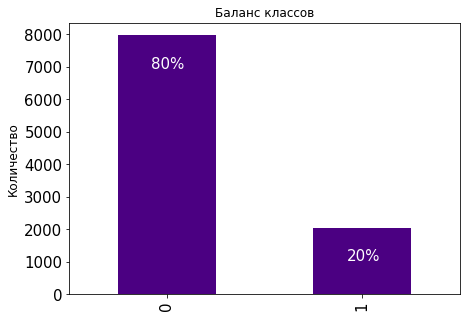

In [55]:
ax = data['exited'].value_counts().plot(kind='bar', figsize=(7, 5),
                                                  color="indigo", fontsize=15);
ax.set_alpha(0.9)
ax.set_title("Баланс классов", fontsize=12)
ax.set_ylabel("Количество", fontsize=12);

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.17, i.get_height()-1000,  \
            str(round((i.get_height()/total)*100))+'%', fontsize=15,
                color='white')

Классы несбалансированны, видим, что их соотношение далеко от 1:1, в данном случае - соотношение классов примерно 1:4. Учтем в 3-м этапе.

Перейдем к оценке качества моделей. Метрики полноты и точности оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Precision выявляет, не переусердствует ли модель, присваивая положительные метки.
Важны обе метрики. Контролировать их параллельно поможет — F1-мера. Изучим показатели на разных моделях без учета дисбаланса классов.

**Модель логистической регрессии** 

In [56]:
%%time

model_logistic =  LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model_logistic.fit(features_train, target_train)
predictions_valid = model_logistic.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.33389544688026984
CPU times: user 102 ms, sys: 272 ms, total: 374 ms
Wall time: 263 ms


**Дерево решений**

In [57]:
import time
from tqdm import tqdm

mylist = [1,2,3,4,5,6,7,8]

for i in tqdm(mylist):
    time.sleep(1)

for depth in range(2, 16):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid = model_tree.predict(features_valid) 
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

100%|██████████| 8/8 [00:08<00:00,  1.00s/it]


max_depth = 2 : 0.5217391304347825
max_depth = 3 : 0.4234875444839857
max_depth = 4 : 0.5528700906344411
max_depth = 5 : 0.5406249999999999
max_depth = 6 : 0.5696969696969697
max_depth = 7 : 0.5320813771517998
max_depth = 8 : 0.5449010654490106
max_depth = 9 : 0.5786516853932585
max_depth = 10 : 0.528995756718529
max_depth = 11 : 0.5201072386058981
max_depth = 12 : 0.5013054830287207
max_depth = 13 : 0.5259067357512954
max_depth = 14 : 0.48391248391248387
max_depth = 15 : 0.5025125628140703


<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) (ее обычно используют для работы из консоли) или [tqdm](https://pypi.org/project/tqdm/) (отлично подойдет для тетрадок) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

Максимальная доля правильных ответов 0.58 при max_depth = 9. Лучший вариант - при глубине дерева 9 доля правильных ответов составляет 58%.

**Случайный лес** 

In [58]:
%%time

model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5786350148367952
CPU times: user 804 ms, sys: 3.95 ms, total: 808 ms
Wall time: 814 ms


ИТОГ без учета дисбаланса классов:
- Logistic Regression - F1 0.33. 
- Decision Tree Classifier - Лучшая F1 0.578 cо значением глубины 9.
- Random Forest Classifier - F1 0.578.
При сравнении моделей, без дополнительных гиперпараметров, одинаковые результаты дают алгоритмы случайного леса и дерева решений. 

## Борьба с дисбалансом

Сделаем вес классов сбалансированным. Посмотрим, как изменится значение F1-меры.

In [59]:
model_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_balanced.fit(features_train, target_train)
predictions_valid = model_balanced.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.4888888888888888


In [60]:
for depth in range(2, 16):
    model_tree_balanced = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_tree_balanced.fit(features_train, target_train)
    predictions_valid = model_tree_balanced.predict(features_valid) 
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 2 : 0.541015625
max_depth = 3 : 0.541015625
max_depth = 4 : 0.5277777777777778
max_depth = 5 : 0.5963791267305644
max_depth = 6 : 0.5581835383159887
max_depth = 7 : 0.5559999999999999
max_depth = 8 : 0.5401174168297456
max_depth = 9 : 0.5338567222767419
max_depth = 10 : 0.5163776493256262
max_depth = 11 : 0.5316973415132925
max_depth = 12 : 0.5097636176772867
max_depth = 13 : 0.49891067538126366
max_depth = 14 : 0.4845132743362832
max_depth = 15 : 0.47410817031070196


In [26]:
model_forest_balanced = RandomForestClassifier(random_state=12345, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)
predicted_valid = model_forest_balanced.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5609756097560976


In [61]:
f1_score_list=0
estimators_list=0
depth_list=0
for es in range(10, 100, 10): 
    for depth in range(2,30):
        model_forest_balanced  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth, class_weight='balanced')
        model_forest_balanced.fit(features_train, target_train)
        predictions_valid = model_forest_balanced .predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_score_list:
            f1_score_list=f1
            estimators_list=es
            depth_list=depth
print("n_estimators:", estimators_list, "depth:", depth_list, "f1", f1_score_list)

n_estimators: 50 depth: 8 f1 0.631236442516269


In [95]:
model_forest_balanced  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('f1:', f1_score(target_test, predicted_test))

f1: 0.4779220779220779


Воспользуемся функцией Upsampling и увеличим количество клиентов оттока. Обучим на новых данных модели, найдем значение F1-меры.

In [65]:
# Применим метод, разделим обучающую выборку на отрицательные и положительные объекты. продублируем объекты положительного класса и объединим их с объектами отрицательного класса

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: exited, dtype: int64


**Логистическая регрессия** 

In [74]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4888888888888888
CPU times: user 38.8 ms, sys: 4.11 ms, total: 43 ms
Wall time: 26.2 ms


**Дерево решений** 

In [75]:
%%time

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
model_tree.fit(features_upsampled, target_upsampled)
predicted_valid = model_tree.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4575645756457565
CPU times: user 38.4 ms, sys: 15 µs, total: 38.4 ms
Wall time: 36.9 ms


**Случайный лес** 

In [76]:
%%time

f1_score_list=0
estimators_list=0
depth_list=0
for es in range(10, 100, 10): 
    for depth in range(2,30):
        model_forest  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_valid = model_forest.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_score_list:
            f1_score_list=f1
            estimators_list=es
            depth_list=depth
print("n_estimators:", estimators_list, "depth:", depth_list, "f1", f1_score_list)

n_estimators: 60 depth: 13 f1 0.626829268292683
CPU times: user 1min 39s, sys: 240 ms, total: 1min 39s
Wall time: 1min 40s


Теперь наоборот, техникой Downsampling сделаем объекты не такими частыми.

In [77]:
## Применим метод. Отбросим часть из отрицательных объектов, с учётом полученных данных создать новую обучающую выборку, применим функцию sample() с аргументом frac.   

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: exited, dtype: int64


**Логистическая регрессия** 

In [78]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5054229934924078
CPU times: user 4.85 ms, sys: 19.9 ms, total: 24.8 ms
Wall time: 10.6 ms


**Дерево решений** 

In [79]:
%%time

model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_downsampled, target_downsampled)
predicted_valid = model_tree.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49158878504672887
CPU times: user 20.2 ms, sys: 2 µs, total: 20.2 ms
Wall time: 19.2 ms


**Случайный лес** 

In [80]:
%%time

model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_downsampled, target_downsampled)
predicted_valid = model_forest.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))
print (recall_score(target_valid, predicted_valid))

F1: 0.6134831460674157
0.65311004784689
CPU times: user 429 ms, sys: 0 ns, total: 429 ms
Wall time: 439 ms


In [81]:
f1_score_list=0
estimators_list=0
depth_list=0
for es in range(10, 100, 10): 
    for depth in range(2,30):
        model_forest  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_valid = model_forest.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_score_list:
            f1_score_list=f1
            estimators_list=es
            depth_list=depth
print("n_estimators:", estimators_list, "depth:", depth_list, "f1", f1_score_list)

print(confusion_matrix(target_valid, predicted_valid))

n_estimators: 60 depth: 13 f1 0.626829268292683
[[1383  199]
 [ 145  273]]


Теперь попробуем изменить значение порога классификации и посмотрим значения и взаимосвязь показателей точности и полноты.

In [82]:
model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.9, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))
    

Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.05 | Точность = 0.212, Полнота = 1.000
Порог = 0.10 | Точность = 0.229, Полнота = 0.990
Порог = 0.15 | Точность = 0.251, Полнота = 0.957
Порог = 0.20 | Точность = 0.273, Полнота = 0.916
Порог = 0.25 | Точность = 0.299, Полнота = 0.864
Порог = 0.30 | Точность = 0.335, Полнота = 0.818
Порог = 0.35 | Точность = 0.361, Полнота = 0.727
Порог = 0.40 | Точность = 0.391, Полнота = 0.663
Порог = 0.45 | Точность = 0.425, Полнота = 0.605
Порог = 0.50 | Точность = 0.462, Полнота = 0.557
Порог = 0.55 | Точность = 0.476, Полнота = 0.459
Порог = 0.60 | Точность = 0.484, Полнота = 0.366
Порог = 0.65 | Точность = 0.504, Полнота = 0.309
Порог = 0.70 | Точность = 0.519, Полнота = 0.256
Порог = 0.75 | Точность = 0.609, Полнота = 0.194
Порог = 0.80 | Точность = 0.641, Полнота = 0.120
Порог = 0.85 | Точность = 0.561, Полнота = 0.055


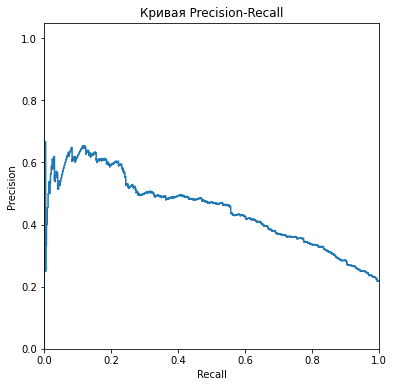

In [83]:
from sklearn.metrics import precision_recall_curve

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

ИТОГ:
- Logistic Regression - F1 0.42 (Upsampling)/ F1 0.42 (Downsampling)
- Decision Tree Classifier - F1 0.48 (Upsampling)/ F1 0.45 (Downsampling)
- Random Forest Classifier - F1 0.58 (Upsampling)/ F1 0.57 (Downsampling)

При сравнении моделей, без дополнительных гиперпараметров, лучший результат в этой задаче даёт алгоритм случайного леса. Найдем подходящие гиперпараметры: глубину дерева, число деревьев.

In [84]:
f1_score_list=0
estimators_list=0
depth_list=0
for es in range(10, 100, 10): 
    for depth in range(2,30):
        model_forest_balanced  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth, class_weight='balanced')
        model_forest_balanced.fit(features_train, target_train)
        predictions_valid = model_forest_balanced.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_score_list:
            f1_score_list=f1
            estimators_list=es
            depth_list=depth
print("n_estimators:", estimators_list, "depth:", depth_list, "f1", f1_score_list)
print("precision:", precision_score(target_valid, predicted_valid))
print("recall:", recall_score(target_valid, predicted_valid))

n_estimators: 50 depth: 8 f1 0.631236442516269
precision: 0.5609756097560976
recall: 0.05502392344497608


Чтобы выявить, как сильно наша модель отличается от случайной, посмотрим ROC-кривую и посчитаем площадь под ROC-кривой. По горизонтали - доля ложноположительных ответов (FPR), а по вертикали — доля истинно положительных ответов (TPR).

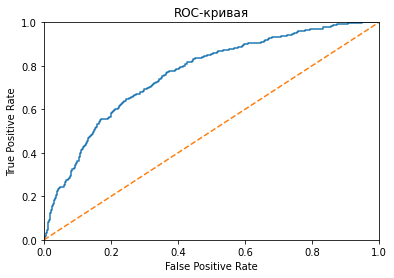

In [91]:
model_forest_balanced  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [92]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('auc_roc', auc_roc)

auc_roc 0.7634769748183815


Да, кассы сбалансированы, итог метрики качества лучше чем у случайной модели, который равен 0,5.

## Тестирование модели

Подобрали наилучшую модель. Проверим её качество на тестовых данных. Модель случайного леса на увеличенной выборке показала лучшее значение F-меры. Поэтому тестировать будем на этой модели.

In [111]:
model_forest_balanced  = RandomForestClassifier(random_state=12345, n_estimators=es, max_depth=depth, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)
predicted_test = model_forest_balanced.predict(features_test)
print('f1:', f1_score(target_test, predicted_test))

f1: 0.5131375579598144


Модель проверена на тестовой выборке. Качество при тестирование равно 60%.

Проверим на метрику качества на выборках, увеличение метрики означает прирост качества модели.

In [112]:
model_forest_balanced = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=8, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)

print("Наилучшая модель")
print("Accuracy на обучающей выборке: ", model.score(features_train, target_train)) 
print("Accuracy на валидационной выборке: ", model.score(features_valid, target_valid))
print("Accuracy на тестовой выборке: ", model.score(features_test, target_test))

Наилучшая модель
Accuracy на обучающей выборке:  0.718
Accuracy на валидационной выборке:  0.701
Accuracy на тестовой выборке:  0.6985


Качество на тестовых данных проверено, высокие показатели, близко 1.

**Общий вывод**

В целом, задача по имеющимся данным выполнена. Результаты могут быть полезны, и уход клиента можно спрогнозировать. 

Перед обучением, построением моделей проанализированы и подготовлены данные (наименования столбцов, пропуски, проведена работа с категориальными признаками).   

Исследован баланс классов и изучены модели без учёта дисбаланса:

Logistic Regression - F1 0.33. Высокая разница при балансировке - 48%!
Decision Tree Classifier - Лучшая F1 0.578 cо значением глубины 9.
Random Forest Classifier - F1 0.578. При сравнении моделей, без дополнительных гиперпараметров, одинаковые результаты дают алгоритмы случайного леса и дерева решений.

Для борьбы с дисбалансом использованы техники Upsampling и Downsampling. Лучшие показатели у алгоритма Random Forest Classifier при увеличении признаков и балансировке:

Random Forest Classifier - F1 0.58 (Upsampling)/ F1 0.57 (Downsampling). Далее с новыми выборками и подбором гиперпараметров 
построена модель с предельно большим значением F1-меры:

Случайный лес - Random Forest Classifier - F1 0.63 при кол-ве деревьев 100, глубине 30.
n_estimators: 50 depth: 8 f1 0.631236442516269

Проведена проверка модели на тестовой выборке, результат 60%.

Проверена метрика коэффициента детерминации наилучшей модели, показатели высокие:

Accuracy на обучающей выборке:  0.718
Accuracy на валидационной выборке:  0.701
Accuracy на тестовой выборке:  0.6985

Для проверки как сильно модель отличается от случайной, построили ROC-кривую и посчитали площадь под ROC-кривой: значение AUC-ROC =  0.76 (достаточно адекватно).